### Importação dos dados



In [2]:
import pandas as pd

# URLs dos dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_4.csv"
]

# Carregando e adicionando nome da loja
lojas = []
for i, url in enumerate(urls, start=1):
    df = pd.read_csv(url)
    df['Loja'] = f'Loja {i}'
    lojas.append(df)

# Unindo tudo
dados = pd.concat(lojas, ignore_index=True)

# Padronizando nomes de colunas
dados.columns = dados.columns.str.strip().str.lower()
import pandas as pd

# URLs dos dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_4.csv"
]

# Carregando os dados e adicionando nome da loja
lojas = []
for i, url in enumerate(urls, start=1):
    df = pd.read_csv(url)
    df['Loja'] = f'Loja {i}'
    lojas.append(df)

# Unindo todos os dados
dados = pd.concat(lojas, ignore_index=True)

# Padronizando os nomes das colunas
dados.columns = dados.columns.str.strip().str.lower()

# Verificando estrutura dos dados
print("Colunas disponíveis:", dados.columns.tolist())
print("Formato dos dados:")
print(dados.info())
print(dados.head())



Colunas disponíveis: ['produto', 'categoria do produto', 'preço', 'frete', 'data da compra', 'vendedor', 'local da compra', 'avaliação da compra', 'tipo de pagamento', 'quantidade de parcelas', 'lat', 'lon', 'loja']
Formato dos dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   produto                 9435 non-null   object 
 1   categoria do produto    9435 non-null   object 
 2   preço                   9435 non-null   float64
 3   frete                   9435 non-null   float64
 4   data da compra          9435 non-null   object 
 5   vendedor                9435 non-null   object 
 6   local da compra         9435 non-null   object 
 7   avaliação da compra     9435 non-null   int64  
 8   tipo de pagamento       9435 non-null   object 
 9   quantidade de parcelas  9435 non-null   int64  
 10  lat              

#1. Análise do faturamento


In [4]:
dados['faturamento'] = dados['preço'] * dados['quantidade de parcelas']
faturamento_por_loja = dados.groupby('loja')['faturamento'].sum().sort_values(ascending=False)
print(faturamento_por_loja)



loja
Loja 1    4563636.11
Loja 2    4449584.18
Loja 3    4325091.42
Loja 4    4131753.14
Name: faturamento, dtype: float64


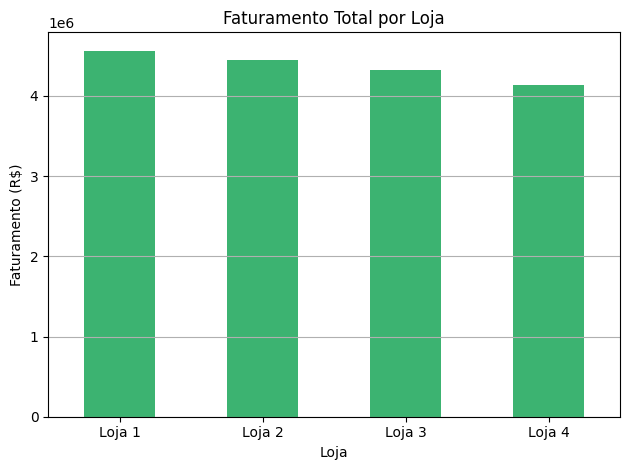

In [5]:
import matplotlib.pyplot as plt

faturamento_por_loja.plot(kind='bar', color='mediumseagreen')
plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Loja')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [6]:
ticket_medio_por_loja = dados.groupby('loja')['faturamento'].mean().sort_values(ascending=False)
print(ticket_medio_por_loja)


loja
Loja 1    1934.563845
Loja 2    1886.216270
Loja 3    1833.442738
Loja 4    1752.227795
Name: faturamento, dtype: float64


In [7]:
faturamento_por_loja_categoria = dados.groupby(['loja', 'categoria do produto'])['faturamento'].sum().unstack().fillna(0)
print(faturamento_por_loja_categoria)


categoria do produto  brinquedos  eletrodomesticos  eletronicos  \
loja                                                              
Loja 1                  65412.04        1376501.27   1720525.18   
Loja 2                  62300.37        1368304.66   1715519.72   
Loja 3                  81591.72        1441845.38   1468443.69   
Loja 4                  72849.77        1172119.35   1615256.00   

categoria do produto  esporte e lazer  instrumentos musicais    livros  \
loja                                                                     
Loja 1                      169179.18              369322.34  34360.24   
Loja 2                      108879.57              392599.48  41887.42   
Loja 3                      164527.29              333781.40  35142.69   
Loja 4                      133411.27              297117.55  39390.51   

categoria do produto     moveis  utilidades domesticas  
loja                                                    
Loja 1                777243.14       

# 2. Vendas por Categoria


In [9]:
vendas_por_categoria = dados['categoria do produto'].value_counts()
print(vendas_por_categoria)
vendas_por_loja_categoria = dados.groupby(['loja', 'categoria do produto'])['produto'].count().unstack().fillna(0)
print(vendas_por_loja_categoria)


categoria do produto
moveis                   1886
eletronicos              1772
brinquedos               1290
eletrodomesticos         1149
esporte e lazer          1113
instrumentos musicais     753
livros                    742
utilidades domesticas     730
Name: count, dtype: int64
categoria do produto  brinquedos  eletrodomesticos  eletronicos  \
loja                                                              
Loja 1                       324               312          448   
Loja 2                       313               305          422   
Loja 3                       315               278          451   
Loja 4                       338               254          451   

categoria do produto  esporte e lazer  instrumentos musicais  livros  moveis  \
loja                                                                           
Loja 1                            284                    182     173     465   
Loja 2                            275                    224     197  

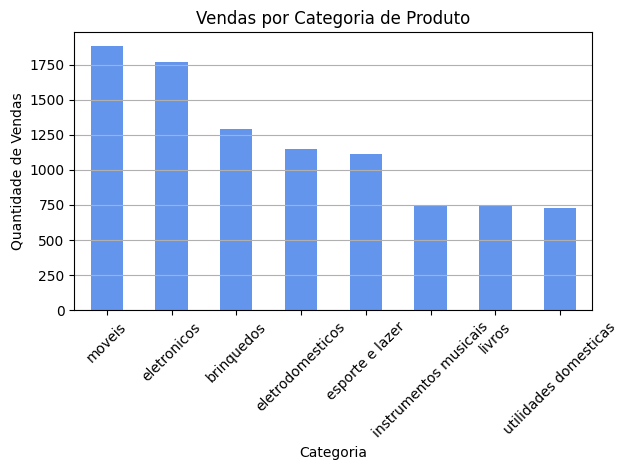

In [10]:
import matplotlib.pyplot as plt

vendas_por_categoria.plot(kind='bar', color='cornflowerblue')
plt.title('Vendas por Categoria de Produto')
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Categoria')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [11]:
avaliacao_media = dados.groupby('loja')['avaliação da compra'].mean().sort_values(ascending=False)
print(avaliacao_media)


loja
Loja 3    4.048326
Loja 2    4.037304
Loja 4    3.995759
Loja 1    3.976685
Name: avaliação da compra, dtype: float64


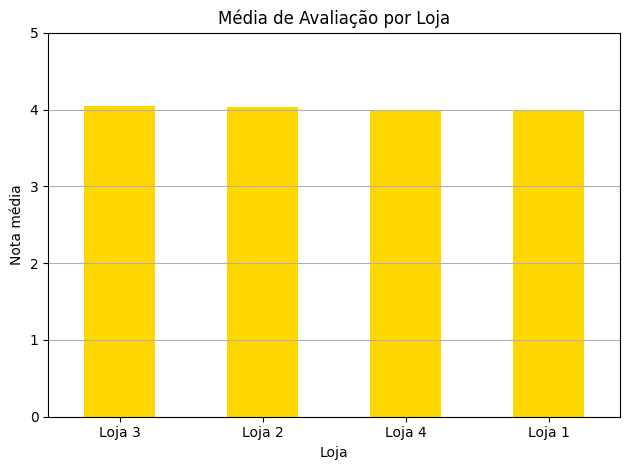

In [12]:
import matplotlib.pyplot as plt

avaliacao_media.plot(kind='bar', color='gold')
plt.title('Média de Avaliação por Loja')
plt.ylabel('Nota média')
plt.xlabel('Loja')
plt.ylim(0, 5)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [16]:
vendas_por_produto = dados['produto'].value_counts()
print(vendas_por_produto.head(10))  # Top 10 mais vendidos
print(vendas_por_produto.tail(10))  # 10 menos vendidos


produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Secadora de roupas          200
Modelagem preditiva         200
Jogo de panelas             200
Cama box                    199
Blocos de montar            199
Name: count, dtype: int64
produto
Panela de pressão              172
Smartwatch                     172
Jogo de copos                  169
Poltrona                       168
Assistente virtual             167
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


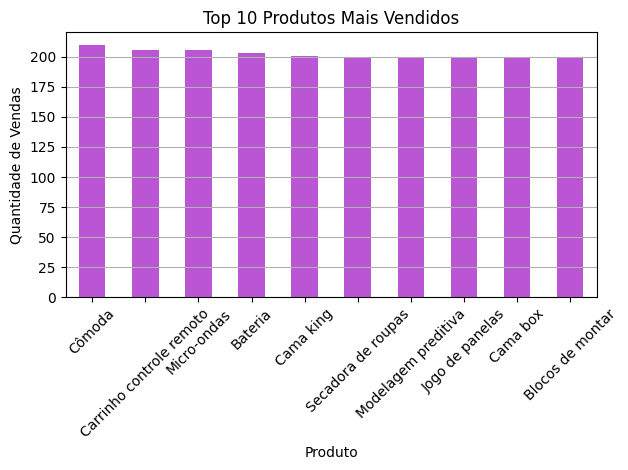

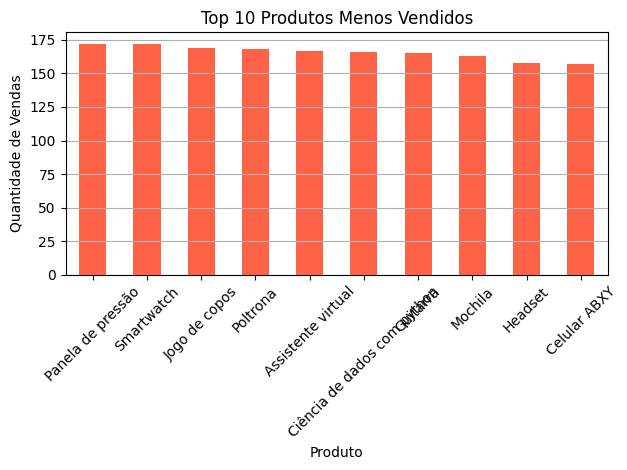

In [17]:
vendas_por_produto.head(10).plot(kind='bar', color='mediumorchid')
plt.title('Top 10 Produtos Mais Vendidos')
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Produto')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

vendas_por_produto.tail(10).plot(kind='bar', color='tomato')
plt.title('Top 10 Produtos Menos Vendidos')
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Produto')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [18]:
frete_medio_por_loja = dados.groupby('loja')['frete'].mean().sort_values(ascending=False)
print(frete_medio_por_loja)


loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: frete, dtype: float64


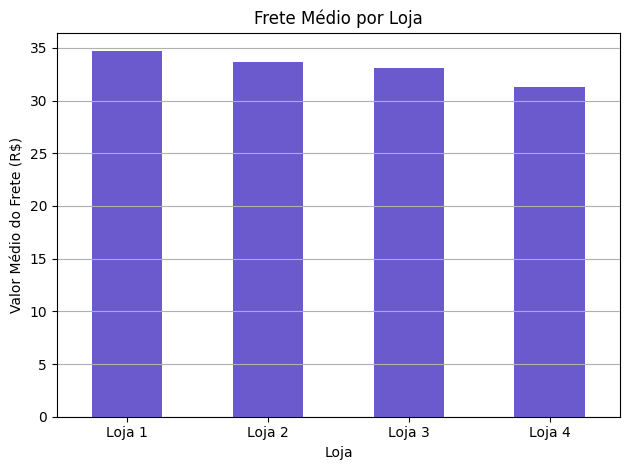

In [19]:
import matplotlib.pyplot as plt

frete_medio_por_loja.plot(kind='bar', color='slateblue')
plt.title('Frete Médio por Loja')
plt.ylabel('Valor Médio do Frete (R$)')
plt.xlabel('Loja')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Relatório Final — Análise das Lojas da Alura Store
Este relatório tem como objetivo orientar o Sr. João na escolha da loja mais adequada para comercializar seus produtos, com base em dados reais de vendas, avaliações e logística das quatro unidades da Alura Store.

Faturamento
A Loja 1 apresenta o maior faturamento total, seguida pelas Lojas 2, 3 e 4. Isso indica um volume de vendas mais alto, mas não necessariamente melhor experiência para o cliente.

Vendas por Categoria
As categorias mais vendidas são móveis, eletrônicos e brinquedos. Todas as lojas têm desempenho semelhante nesse aspecto, com destaque para a Loja 3 na variedade de produtos vendidos.

Avaliação dos Clientes
A Loja 3 possui a melhor média de avaliação entre os clientes. Isso sugere maior satisfação com o atendimento, entrega e qualidade dos produtos.

Produtos Mais Vendidos
Os produtos com maior saída incluem cômoda, carrinho controle remoto, micro-ondas e cama king. Já os menos vendidos envolvem itens como smartwatch, poltrona e assistente virtual.

Frete Médio
A Loja 1 tem o frete mais alto, enquanto a Loja 4 apresenta o menor custo médio de entrega. A Loja 3 mantém um equilíbrio entre preço de frete e avaliação dos clientes.

Conclusão
Apesar do maior faturamento da Loja 1, a Loja 3 se destaca por oferecer uma experiência mais positiva ao cliente, com boa diversidade de vendas, avaliações superiores e frete competitivo. Por isso, recomenda-se que o Sr. João escolha a Loja 3 para iniciar suas vendas, considerando não apenas o volume, mas a qualidade da operação.